In [1]:
import lsdb
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 999999

In [2]:
from dask.distributed import Client

client = Client(n_workers=10, memory_limit="8GB")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 20,Total memory: 74.51 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:58176,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 74.51 GiB
Comm: tcp://127.0.0.1:58199,Total threads: 2
Dashboard: http://127.0.0.1:58200/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:58179,


In [3]:
splus_dr4 = lsdb.read_hats(
    path='https://splus.cloud/HIPS/catalogs/dr4/dual', 
    margin_cache='https://splus.cloud/HIPS/catalogs/dr4/dual_2arcsec'
)
list(splus_dr4.columns)

['ID',
 'RA',
 'DEC',
 'A',
 'B',
 'BACKGROUND',
 'BACKGROUND_J0378',
 'BACKGROUND_J0395',
 'BACKGROUND_J0410',
 'BACKGROUND_J0430',
 'BACKGROUND_J0515',
 'BACKGROUND_J0660',
 'BACKGROUND_J0861',
 'BACKGROUND_g',
 'BACKGROUND_i',
 'BACKGROUND_r',
 'BACKGROUND_u',
 'BACKGROUND_z',
 'CLASS_STAR',
 'DET_ID_dual',
 'EBV_SCH',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 'FWHM',
 'FWHM_J0378',
 'FWHM_J0395',
 'FWHM_J0410',
 'FWHM_J0430',
 'FWHM_J0515',
 'FWHM_J0660',
 'FWHM_J0861',
 'FWHM_g',
 'FWHM_i',
 'FWHM_n',
 'FWHM_n_J0378',
 'FWHM_n_J0395',
 'FWHM_n_J0410',
 'FWHM_n_J0430',
 'FWHM_n_J0515',
 'FWHM_n_J0660',
 'FWHM_n_J0861',
 'FWHM_n_g',
 'FWHM_n_i',
 'FWHM_n_r',
 'FWHM_n_u',
 'FWHM_n_z',
 'FWHM_r',
 'FWHM_u',
 'FWHM_z',
 'Field',
 'ID_DEC',
 'ID_RA',
 'ISOarea',
 'J0378_ID_dual',
 'J0378_PStotal',
 'J0378_aper_3',
 'J0378_aper_6',
 'J0378_auto',
 'J0378_iso',
 'J0378_petro',
 'J0395_ID_dual',
 'J0395_PStotal',
 'J0395_ape

In [ ]:
splus_dr4 = lsdb.read_hats(
    path='https://splus.cloud/HIPS/catalogs/dr4/dual', 
    margin_cache='https://splus.cloud/HIPS/catalogs/dr4/dual_2arcsec',
    columns=["ID", "RA", "DEC", "FWHM",
            "r_PStotal", "e_r_PStotal",
            "g_PStotal", "e_g_PStotal",
            "i_PStotal", "e_i_PStotal",
            "z_PStotal", "e_z_PStotal",
            "u_PStotal", "e_u_PStotal",
            "J0378_PStotal", "e_J0378_PStotal",
            "J0395_PStotal", "e_J0395_PStotal",
            "J0410_PStotal", "e_J0410_PStotal",
            "J0430_PStotal", "e_J0430_PStotal",
            "J0515_PStotal", "e_J0515_PStotal",
            "J0660_PStotal", "e_J0660_PStotal",
            "J0861_PStotal", "e_J0861_PStotal",
            "CLASS_STAR", #"EBV_SCH"
        ],
)

In [5]:
gaia = lsdb.read_hats(
    path = 'https://data.lsdb.io/hats/gaia_dr3/gaia', 
    margin_cache='https://data.lsdb.io/hats/gaia_dr3/gaia_10arcs'
)

In [6]:
splus_gaia = splus_dr4.crossmatch(
    gaia, 
    suffixes=("_dual", "_gaia"),
)

In [8]:
table = splus_gaia.box_search(
    [-10, 10],
    [-2, 2]
).compute()

2025-04-04 11:34:58,122 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:51298 -> tcp://127.0.0.1:51314
Traceback (most recent call last):
  File "/Users/gustavoschwarz/Documents/XI-LAPIS-ML-astrocatalogs/.conda/lib/python3.12/site-packages/tornado/iostream.py", line 962, in _handle_write
    num_bytes = self.write_to_fd(self._write_buffer.peek(size))
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gustavoschwarz/Documents/XI-LAPIS-ML-astrocatalogs/.conda/lib/python3.12/site-packages/tornado/iostream.py", line 1124, in write_to_fd
    return self.socket.send(data)  # type: ignore
           ^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 55] No buffer space available

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gustavoschwarz/Documents/XI-LAPIS-ML-astrocatalogs/.conda/lib/python3.12/site-packages/distributed/worker.py", line 1797, in get_data
    response = await 

## Crossmatch with Gaia and Basic Quality Cuts
We crossmatch S-PLUS Stripe82 sources with Gaia using a 1 arcsec radius. Afterward, we apply quality cuts based on S-PLUS photometric features to ensure reliable measurements. These cuts include FWHM limits and S/N thresholds.

In [9]:
table

,ID_dual,RA_dual,DEC_dual,r_PStotal_dual,e_r_PStotal_dual,g_PStotal_dual,e_g_PStotal_dual,i_PStotal_dual,e_i_PStotal_dual,z_PStotal_dual,e_z_PStotal_dual,u_PStotal_dual,e_u_PStotal_dual,J0378_PStotal_dual,e_J0378_PStotal_dual,J0395_PStotal_dual,e_J0395_PStotal_dual,J0410_PStotal_dual,e_J0410_PStotal_dual,J0430_PStotal_dual,e_J0430_PStotal_dual,J0515_PStotal_dual,e_J0515_PStotal_dual,J0660_PStotal_dual,e_J0660_PStotal_dual,J0861_PStotal_dual,e_J0861_PStotal_dual,CLASS_STAR_dual,solution_id_gaia,designation_gaia,source_id_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,parallax_error_gaia,pm_gaia,pmra_gaia,pmra_error_gaia,pmdec_gaia,pmdec_error_gaia,phot_g_n_obs_gaia,phot_g_mean_flux_gaia,phot_g_mean_flux_error_gaia,phot_g_mean_mag_gaia,phot_bp_n_obs_gaia,phot_bp_mean_flux_gaia,phot_bp_mean_flux_error_gaia,phot_bp_mean_mag_gaia,phot_rp_n_obs_gaia,phot_rp_mean_flux_gaia,phot_rp_mean_flux_error_gaia,phot_rp_mean_mag_gaia,_dist_arcsec
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29180741222,DR4_3_STRIPE82-0066_0000044,45.004959,0.020076,14.116838,0.001601,15.02746,0.002573,13.825285,0.001513,13.644547,0.001642,17.366718,1.200487,17.059683,0.233459,16.875013,0.880931,15.896931,0.279263,16.72472,5.585129,16.368568,2.024208,16.637413,0.981542,13.763688,0.715817,0.995896,1636148068921376768,Gaia DR3 38655544960,38655544960,2016.0,45.004978,0.017885,0.01988,0.018772,3.13917,0.022347,35.30821,29.686339,0.023772,19.1152,0.02383,180,42030.600439,11.392837,14.128453,20,17955.479377,26.03932,14.70305,19,34263.48754,36.75135,13.410816,0.711256
29640531643,DR4_3_STRIPE82-0066_0000065,45.004305,0.021058,17.775681,0.010226,19.064325,0.022319,16.696545,0.006351,16.17189,0.006307,23.384266,1.539276,21.898052,0.656429,21.66411,0.827043,21.13084,0.384301,20.037142,0.140711,19.016142,0.053482,17.461317,0.010711,16.309418,0.010447,0.867975,1636148068921376768,Gaia DR3 34361129088,34361129088,2016.0,45.00432,0.09732,0.021048,0.101753,3.235017,0.12045,35.230515,29.518344,0.133693,19.231655,0.133922,170,1763.191387,2.121236,17.571619,18,389.997136,9.491409,18.86089,19,2178.214858,15.074686,16.402643,0.064456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458764508179653417,DR4_3_STRIPE82-0107_0057005,314.990403,-0.008371,17.640268,0.010521,18.902882,0.022308,16.968122,0.00782,16.68412,0.009608,22.456354,0.814497,21.896704,0.791336,20.277853,0.310296,20.114332,0.201087,20.171556,0.19678,18.745335,0.051871,17.385218,0.010842,16.764053,0.01326,0.982403,1636148068921376768,Gaia DR3 6917528993281571840,6917528993281571840,2016.0,314.990401,0.129505,-0.008369,0.052264,1.175744,0.128034,13.372766,-9.433525,0.185407,-9.478368,0.096104,447,1739.754292,1.372299,17.586147,51,552.641425,7.744895,18.482433,48,1734.341836,8.270522,16.650059,0.010726
3458764513362305667,DR4_3_STRIPE82-0107_0061315,314.999048,-0.002562,19.464508,0.039885,20.224165,0.061388,19.144636,0.041084,18.979893,0.063465,22.209047,0.632326,21.412207,0.4947,20.600666,0.40791,21.147398,0.51233,21.063625,0.445986,20.213146,0.179509,19.309519,0.041468,18.968538,0.074764,0.962504,1636148068921376768,Gaia DR3 6917528993283204480,6917528993283204480,2016.0,314.999051,0.467057,-0.002571,0.176014,0.940248,0.400975,4.621335,1.344754,0.566544,-4.421355,0.285011,439,295.298985,0.771409,19.511711,45,124.033911,5.906086,20.10469,47,247.428814,5.507882,18.764269,0.035233


In [11]:

df_filtered = table[(table['CLASS_STAR_dual'] > 0.98) &
                    (table['e_r_PStotal_dual'] < 0.03) 
                    
                    ]
df_filtered.shape

(693845, 56)

## Visualizing Quality Cuts
The plots below illustrate the distributions of `FWHM` and `CLASS_STAR`. We use them to justify our cuts, removing extended sources and low-quality detections.

In [ ]:
table.

KeyError: "Column 'FWHM_dual' not found in nested columns or base columns"

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(table['FWHM'], bins=100, range=(0, 0.002))
axs[0].axvline(0.001, color='red', linestyle='--')
axs[0].set_title('FWHM distribution')
axs[1].hist(table['CLASS_STAR'], bins=100, range=(0, 1))
axs[1].axvline(0.1, color='red', linestyle='--')
axs[1].set_title('CLASS_STAR distribution')
plt.tight_layout()
plt.show()

## Train-Test Split
We randomly select 30% of the sources as our test set. The remaining 70% will be used for training.

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_filtered, test_size=0.3, random_state=42)
train_df.shape, test_df.shape

In [10]:
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 999999

In [11]:
def gaia_query(ra, dec, radius = 1):
    job = Gaia.launch_job_async("select "
                      " "
                      "source.source_id, source.ra, source.dec, "
                      "source.parallax, source.parallax_error, "
                      "source.phot_g_mean_mag, source.phot_bp_mean_mag, source.phot_rp_mean_mag, "
                      "source.pseudocolour, source.phot_g_mean_flux, source.phot_bp_mean_flux, source.phot_rp_mean_flux, "
                      "source.teff_gspphot, astp.dibp0_gspspec, astp.activityindex_espcs, astp.teff_esphs, "
                      "source.phot_g_mean_flux_error, source.phot_bp_mean_flux_error, source.phot_rp_mean_flux_error, "
                      "source.bp_rp, source.bp_g, source.g_rp, "
                      "astp.teff_gspphot, astp.logg_gspphot, astp.mh_gspphot, "
                      "astp.distance_gspphot, astp.azero_gspphot, astp.ebpminrp_gspphot, "
                      "astp.mg_gspphot, astp.teff_gspspec, astp.logg_gspspec, astp.mh_gspspec, "
                      "astp.ew_espels_halpha, astp.azero_esphs, astp.ebpminrp_esphs, "
                      "astp.lum_flame, astp.mass_flame, astp.age_flame, "
                      "source.phot_proc_mode, astp.classprob_dsc_combmod_star "
                      "from gaiadr3.gaia_source as source join "
                      "gaiadr3.astrophysical_parameters as astp on source.source_id = astp.source_id "
                      f"where 1=contains(point('ICRS', source.ra, source.dec), circle('ICRS', {ra}, {dec}, {radius / 3600})) "
                      "and astp.classprob_dsc_combmod_star > 0.9",
    )
    
    r = job.get_results()

    return r

In [16]:
gaia_tab = gaia_query(0.1, 0.1, 4 * 3600)

INFO: Query finished. [astroquery.utils.tap.core]


In [17]:
import numpy as np
import time
import warnings

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import hstack, vstack, Table, join
from astropy.time import Time

from logpool import control


def inner_merge_tables(
    t1, 
    t2, 
    t1_coord_cols=["ra", "dec"], 
    t2_coord_cols=["ALPHA_J2000", "DELTA_J2000"], 
    sep=1,
    t1_epoch="J2000",
    add_metadata=True,
    match_prefix="match_"
):
    """
    Merge two tables based on sky coordinate matching, keeping only matched rows.
    
    This function performs an inner join between two tables based on spatial proximity
    of celestial coordinates. Only rows that have a match within the specified separation
    limit are included in the output.
    
    Parameters
    ----------
    t1 : astropy.table.Table
        First table (reference table)
    t2 : astropy.table.Table
        Second table (table to match)
    t1_coord_cols : list, optional
        Column names for RA and Dec in the first table, by default ["ra", "dec"]
    t2_coord_cols : list, optional
        Column names for RA and Dec in the second table, by default ["ALPHA_J2000", "DELTA_J2000"]
    sep : float, optional
        Maximum separation in arcseconds for a valid match, by default 1
    t1_epoch : str, optional
        Epoch of coordinates in first table, by default "J2000"
    add_metadata : bool, optional
        Whether to add merge metadata to the output table, by default True
    match_prefix : str, optional
        Prefix for match quality columns added to the output, by default "match_"
    
    Returns
    -------
    astropy.table.Table
        Merged table containing only rows that match between the two input tables
    
    Notes
    -----
    - The matching is performed using the astropy.coordinates.SkyCoord.match_to_catalog_sky method
    - Column name conflicts are handled by appending '_1' and '_2' suffixes
    - A separation column is added to the output table showing the distance between matched pairs
    """
    start_time = time.time()
    

    # Check for empty tables
    if len(t1) == 0:
        raise ValueError("First table is empty")
    
    if len(t2) == 0:
        raise ValueError("Second table is empty")
    
    # Check for required columns
    for table_name, table, cols in [("First", t1, t1_coord_cols), ("Second", t2, t2_coord_cols)]:
        for col in cols:
            if col not in table.colnames:
                raise ValueError(f"{table_name} table is missing required column: {col}")
    
    
    # Create SkyCoord objects
    try:
        
        # Suppress warnings about NaN values in coordinates
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            
            # Extract coordinate arrays, handling potential issues
            t1_ra = np.array(t1[t1_coord_cols[0]], dtype=float)
            t1_dec = np.array(t1[t1_coord_cols[1]], dtype=float)
            t2_ra = np.array(t2[t2_coord_cols[0]], dtype=float)
            t2_dec = np.array(t2[t2_coord_cols[1]], dtype=float)
            
            # Check for NaN values
            t1_nan_mask = np.isnan(t1_ra) | np.isnan(t1_dec)
            t2_nan_mask = np.isnan(t2_ra) | np.isnan(t2_dec)
            
            t1_nan_count = np.sum(t1_nan_mask)
            t2_nan_count = np.sum(t2_nan_mask)
            
            if t1_nan_count > 0:
                print(f"⚠ First table contains {t1_nan_count} rows with NaN coordinates")
            
            if t2_nan_count > 0:
                print(f"⚠ Second table contains {t2_nan_count} rows with NaN coordinates")
            
            # Create SkyCoord objects
            if t1_nan_count > 0:
                # Handle NaN values by creating a masked array
                valid_t1_mask = ~t1_nan_mask
                t1_coords = SkyCoord(
                    ra=t1_ra[valid_t1_mask]*u.deg, 
                    dec=t1_dec[valid_t1_mask]*u.deg, 
                    frame='icrs'
                )
            else:
                t1_coords = SkyCoord(ra=t1_ra*u.deg, dec=t1_dec*u.deg, frame='icrs')
            
            if t2_nan_count > 0:
                # Handle NaN values by creating a masked array
                valid_t2_mask = ~t2_nan_mask
                t2_coords = SkyCoord(
                    ra=t2_ra[valid_t2_mask]*u.deg, 
                    dec=t2_dec[valid_t2_mask]*u.deg, 
                    frame='icrs'
                )
            else:
                t2_coords = SkyCoord(ra=t2_ra*u.deg, dec=t2_dec*u.deg, frame='icrs')
            
            # Use valid data for t1 and t2
            t1_subset = t1[~t1_nan_mask] if t1_nan_count > 0 else t1
            t2_subset = t2[~t2_nan_mask] if t2_nan_count > 0 else t2
    
    except Exception as e:
        raise
    
    # Perform coordinate matching
    match_start = time.time()
    
    try:
        idx, sep2d, _ = t2_coords.match_to_catalog_sky(t1_coords)
        match_time = time.time() - match_start
    except Exception as e:
        raise
    
    # Apply separation filter
    matched_mask = sep2d < sep * u.arcsec
    match_count = np.sum(matched_mask)
    
    
    if match_count == 0:
        
        # Return empty table with appropriate structure
        merged_cols = t2.colnames + t1.colnames + [f"{match_prefix}sep"]
        merged_table = Table(names=merged_cols, dtype=[t2.dtype[col] for col in t2.colnames] + 
                                                       [t1.dtype[col] for col in t1.colnames] + 
                                                       [float])
        return merged_table
    
    # Get matched rows from both tables
    if t2_nan_count > 0:
        df_matched = t2_subset[matched_mask]
    else:
        df_matched = t2[matched_mask]
        
    tab_selection_matched = t1_subset[idx[matched_mask]]
    
    # Combine matched rows
    try:
        # Resolve column conflicts
        t1_cols = set(tab_selection_matched.colnames)
        t2_cols = set(df_matched.colnames)
        common_cols = t1_cols.intersection(t2_cols)
        
        if common_cols:
            
            # Rename columns in second table to avoid conflicts
            for col in common_cols:
                if col not in t1_coord_cols and col not in t2_coord_cols:
                    df_matched.rename_column(col, f"{col}_2")
        
        # Stack the tables horizontally
        merged_table = hstack([df_matched, tab_selection_matched])
        
        # Add match quality information
        merged_table[f"{match_prefix}sep"] = sep2d[matched_mask].to(u.arcsec)
        
        # Add metadata if requested
        if add_metadata:
            merged_table.meta["MERGETYP"] = "INNER"
            merged_table.meta["MERGESEP"] = sep
            merged_table.meta["MERGECNT"] = match_count
            merged_table.meta["MERGEDAT"] = time.strftime("%Y-%m-%dT%H:%M:%S", time.gmtime())
        
        # Final report
        elapsed = time.time() - start_time
        print(f"✓ Inner merge completed in {elapsed:.2f} seconds")
        print(f"  ↳ Result table: {len(merged_table)} rows, {len(merged_table.colnames)} columns")
        
        return merged_table
        
    except Exception as e:
        raise

In [21]:
finaltab = inner_merge_tables(tab, gaia_tab, t1_coord_cols=["RA", "DEC"], t2_coord_cols=["ra", "dec"])

✓ Inner merge completed in 0.18 seconds
  ↳ Result table: 60472 rows, 62 columns


In [42]:
len(finaltab) - np.sum(np.isnan(finaltab["logg_gspphot"]).mask)

27391

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [36]:
df = finaltab.to_pandas()

## Seleção de Áreas Aleatórias no Céu
Selecionamos posições aleatórias dentro da footprint do S-PLUS para simular a aquisição de dados em diferentes regiões do céu. Isso nos permite testar a robustez dos modelos e a consistência dos dados em várias direções.

In [ ]:
import random
random_coords = [(random.uniform(0, 360), random.uniform(-70, 10)) for _ in range(3)]  # (RA, Dec)
random_coords

## Consulta Gaia para Regiões Aleatórias
A função abaixo realiza uma busca no Gaia DR3 para estrelas dentro de 4 arcmin ao redor de cada coordenada aleatória.

In [ ]:
gaia_results = []
for ra, dec in random_coords:
    tab_splus = conn.query(f"""
        SELECT * FROM dr3_tile WHERE q3c_radial_query(ra, dec, {ra}, {dec}, 0.066)  -- ~4 arcmin
    """)
    gaia_tab = gaia_query(ra, dec, radius=4 * 3600)  # 4 arcmin
    merged = inner_merge_tables(tab_splus, gaia_tab, t1_coord_cols=["RA", "DEC"], t2_coord_cols=["ra", "dec"])
    gaia_results.append(merged)

## Cortes de Qualidade nos Dados
Aplicamos filtros para garantir a confiabilidade das variáveis astrofísicas utilizadas, como:
- `phot_g_mean_flux_over_error > 50`
- `logg` entre 0 e 5
- `bp_rp` não nulo

Abaixo, justificamos graficamente os cortes escolhidos.

In [ ]:
import matplotlib.pyplot as plt
df = finaltab.to_pandas()
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(df['phot_g_mean_flux_over_error'], bins=100, range=(0, 100))
axs[0].axvline(50, color='red', linestyle='--')
axs[0].set_title('G Flux Over Error')

axs[1].hist(df['logg_gspphot'], bins=100, range=(-1, 6))
axs[1].axvline(0, color='red', linestyle='--')
axs[1].axvline(5, color='red', linestyle='--')
axs[1].set_title('logg_gspphot')

axs[2].hist(df['bp_rp'], bins=100)
axs[2].set_title('bp_rp')
plt.tight_layout()
plt.show()


In [ ]:
df_quality = df[(df['phot_g_mean_flux_over_error'] > 50) & 
                (df['logg_gspphot'] > 0) & (df['logg_gspphot'] < 5) &
                (~df['bp_rp'].isna())]
df_quality.shape

## Divisão Treino/Teste
Dividimos os dados de alta qualidade em subconjuntos de treino (80%) e teste (20%) para treinar modelos e avaliar seu desempenho.

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_quality, test_size=0.2, random_state=42)
train_df.shape, test_df.shape

MAE: 106.61 K
R²: 0.953


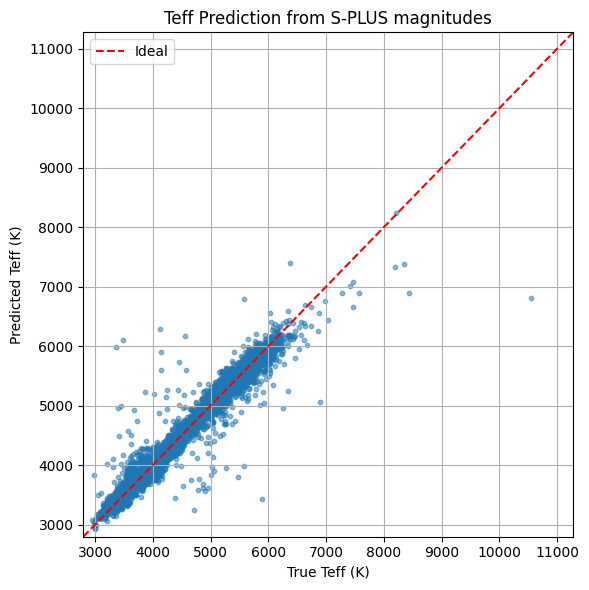

In [ ]:
# Define features and target
splus_mags = [
    'u_auto', 'g_auto', 'r_auto', 'i_auto', 'z_auto',
    'J0378_auto', 'J0395_auto', 'J0410_auto', 'J0430_auto',
    'J0515_auto', 'J0660_auto', 'J0861_auto'
]
target = 'teff_gspphot'

# Drop rows with missing values in features or target
df_clean = df.dropna(subset=splus_mags + [target])

# Features and target
X = df_clean[splus_mags].values
y = df_clean[target].values

# Scale features (optional for trees, but good for generality)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} K")
print(f"R²: {r2:.3f}")

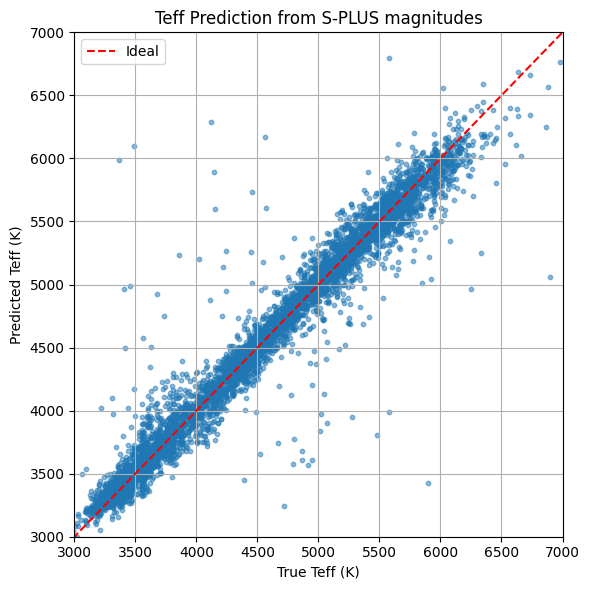

In [39]:
# Plot: True vs Predicted Teff
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")
plt.xlabel("True Teff (K)")
plt.ylabel("Predicted Teff (K)")

plt.xlim(3000, 7000)
plt.ylim(3000, 7000)

plt.title("Teff Prediction from S-PLUS magnitudes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("teff_prediction.png", dpi=150)
plt.show()

MAE: 0.139 dex
R²: 0.483


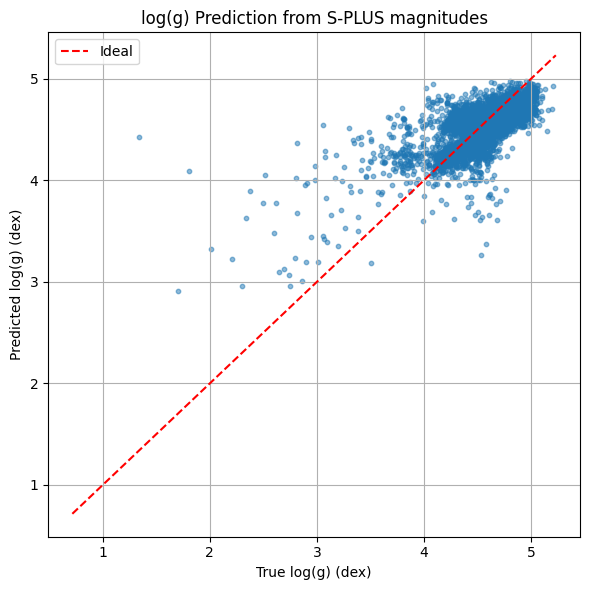

In [44]:
# Define features and target
splus_mags = [
    'u_auto', 'g_auto', 'r_auto', 'i_auto', 'z_auto',
    'J0378_auto', 'J0395_auto', 'J0410_auto', 'J0430_auto',
    'J0515_auto', 'J0660_auto', 'J0861_auto'
]
target = 'logg_gspphot'

# Drop rows with missing values in features or target
df_clean = df.dropna(subset=splus_mags + [target])

# Features and target
X = df_clean[splus_mags].values
y = df_clean[target].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} dex")
print(f"R²: {r2:.3f}")

# Plot: True vs Predicted logg
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")
plt.xlabel("True log(g) (dex)")
plt.ylabel("Predicted log(g) (dex)")
plt.title("log(g) Prediction from S-PLUS magnitudes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("logg_prediction.png", dpi=150)
plt.show()